# Customer Churn Prediction in Banking

The data is from https://www.kaggle.com/sakshigoyal7/credit-card-customers

There are 4 models used in this notebook and the best model is XGBoostClassifier with accuracy 0.97

## Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('BankChurners.csv')
data1 = data.drop(['CLIENTNUM',
            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [71]:
data1.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [74]:
data1.duplicated().value_counts()

False    10127
dtype: int64

In [12]:
data1.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
#numerical 
data1.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [7]:
#categorical
data1.describe(include='O')

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

## EDA

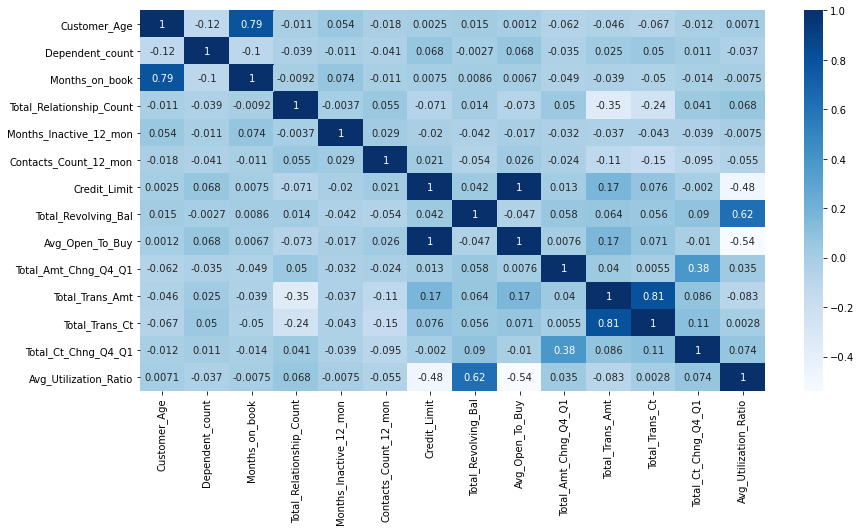

In [11]:
plt.figure(figsize=(14,7))
sns.heatmap(data=data1.corr(), annot=True, cmap='Blues');

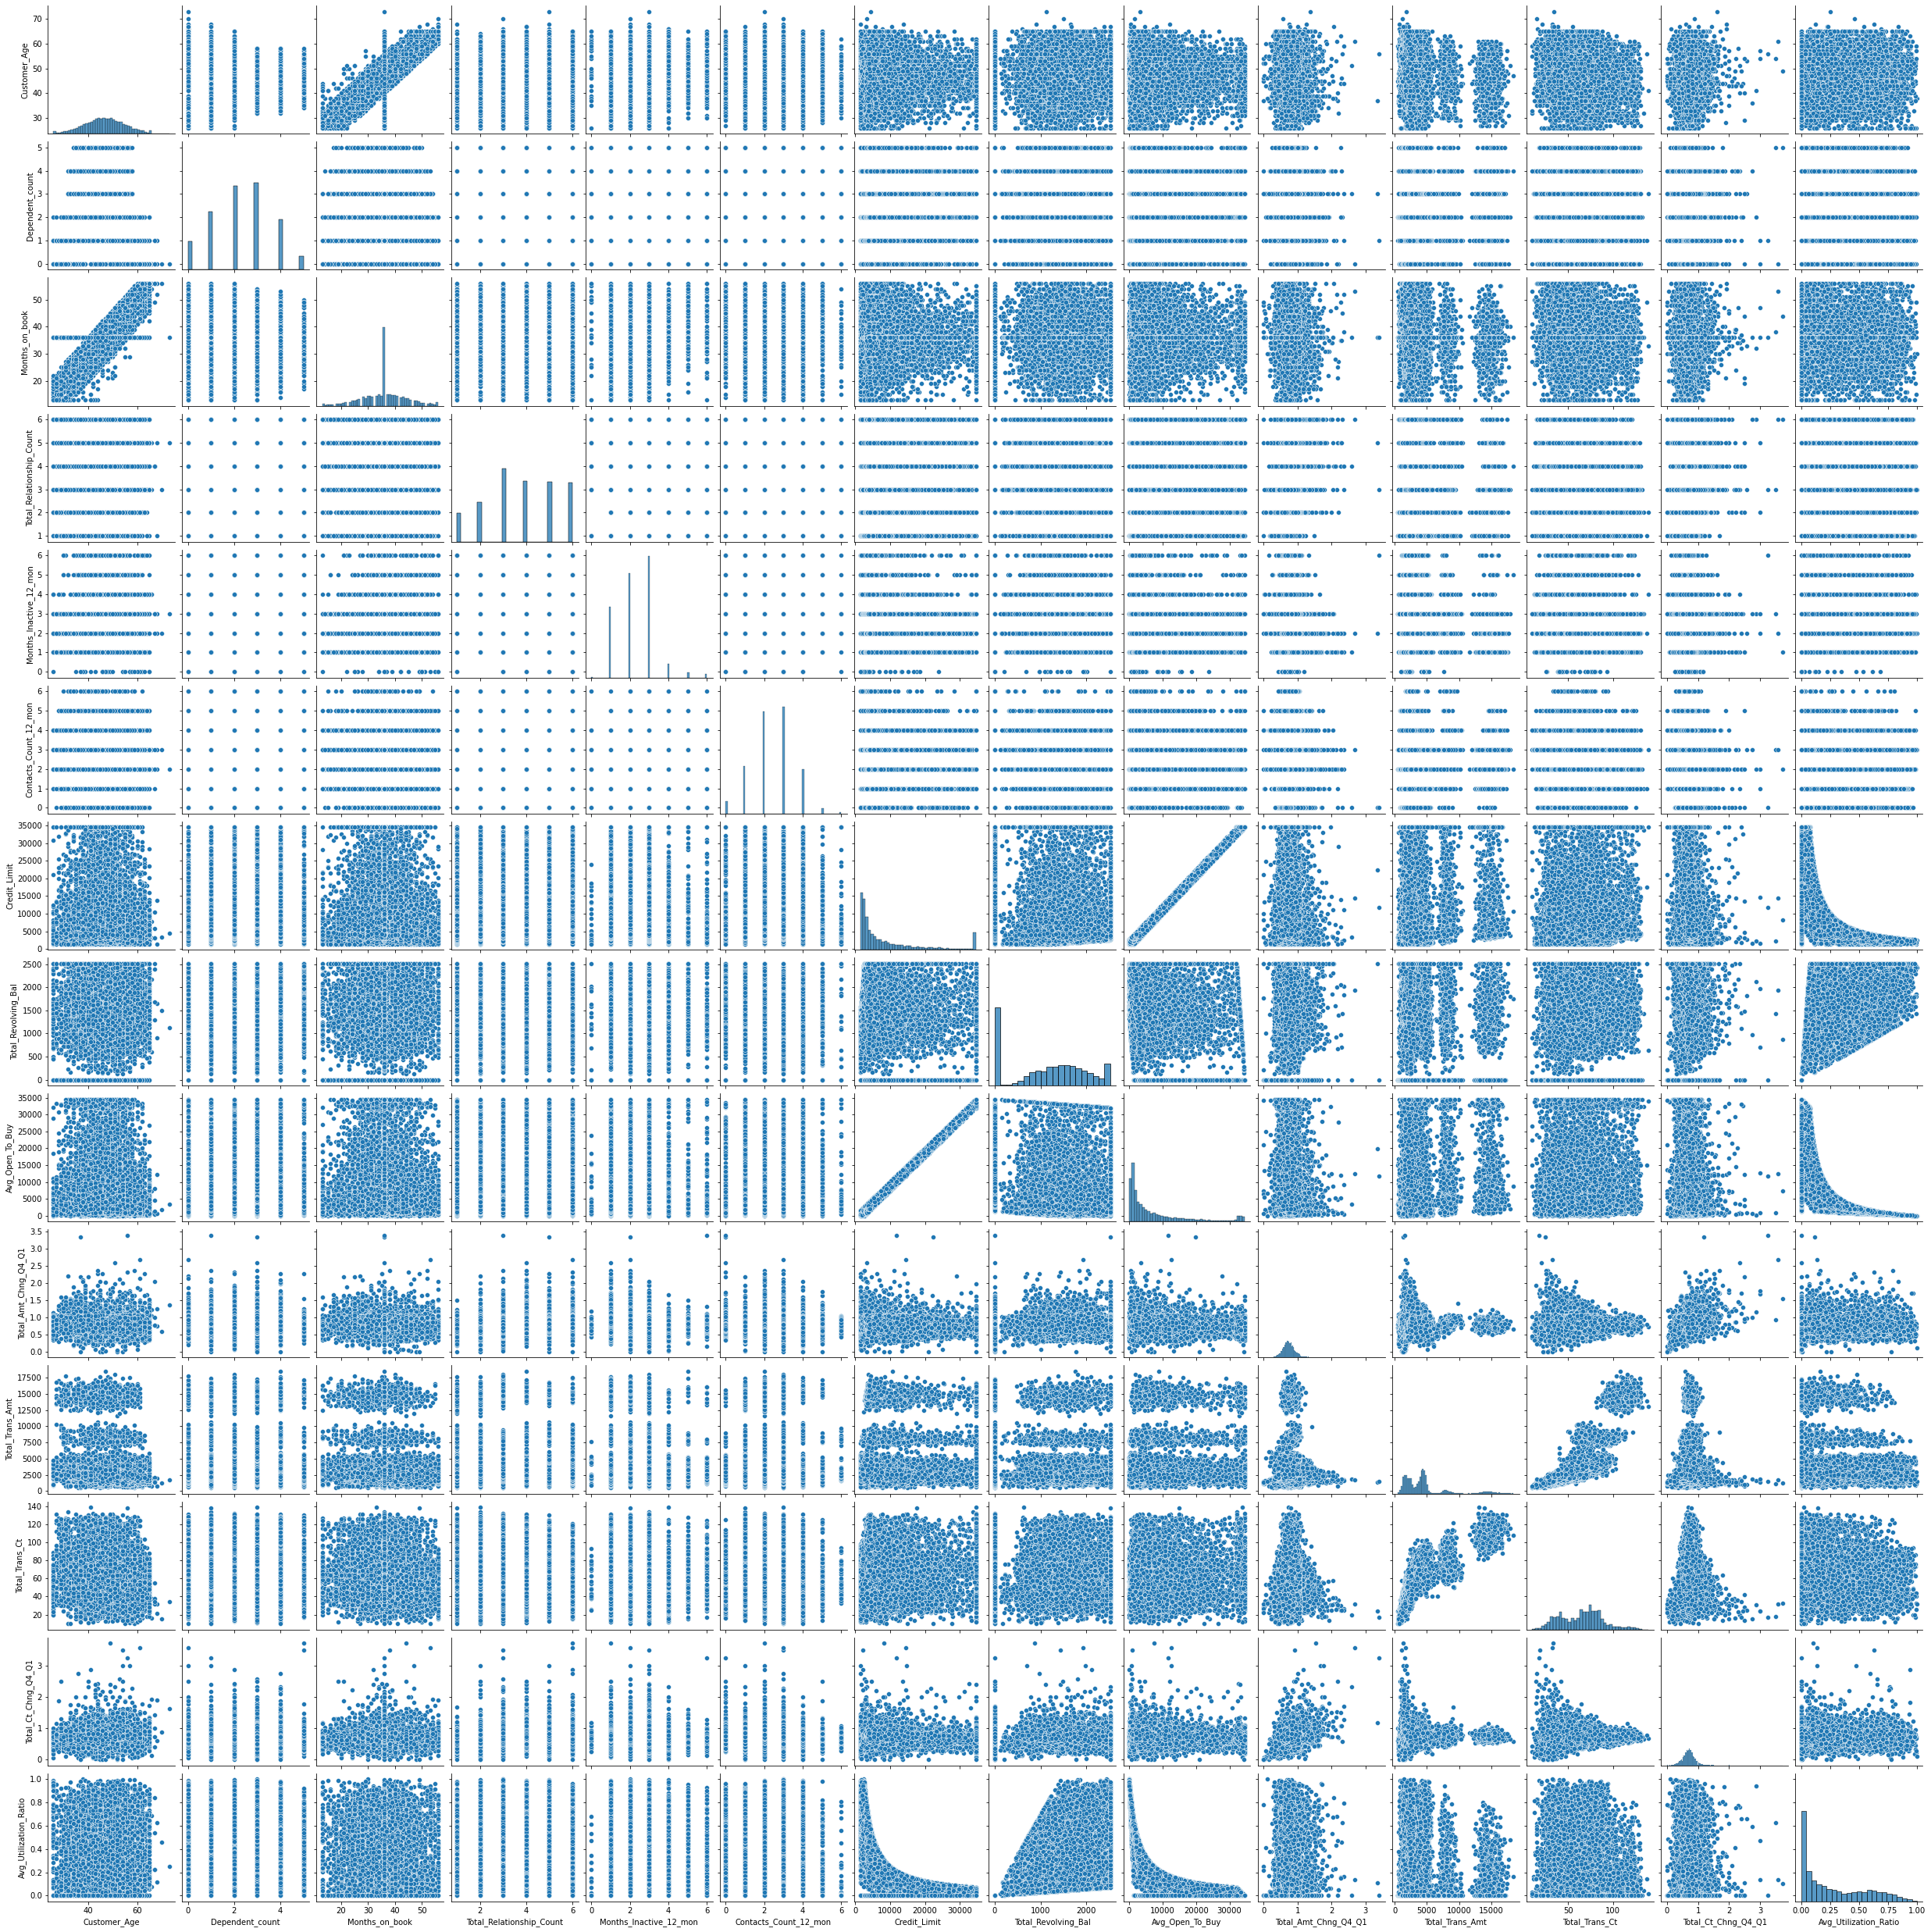

In [3]:
sns.pairplot(data1)

### Positive Corelation

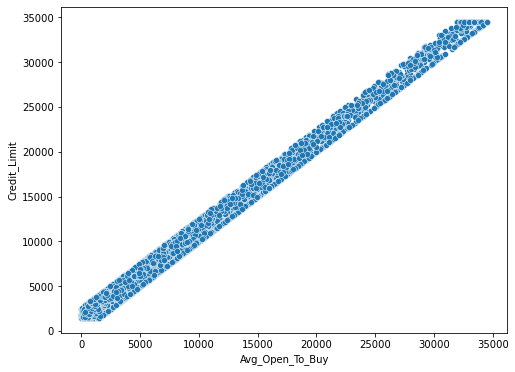

In [63]:
# the average open to buy credit line will increase along with the higher credit limit
plt.figure(figsize=(8,6))
sns.scatterplot(x="Avg_Open_To_Buy", y="Credit_Limit", data=data1);

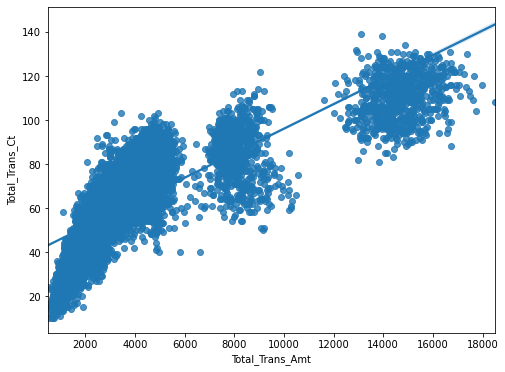

In [70]:
plt.figure(figsize=(8,6))
sns.regplot(x="Total_Trans_Amt", y="Total_Trans_Ct", data=data1);

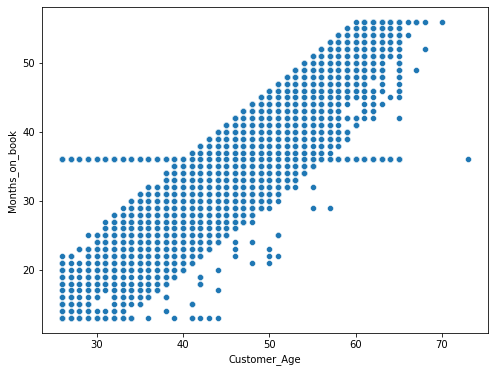

In [65]:
#older customers tends to take the loan
plt.figure(figsize=(8,6))
sns.scatterplot(x="Customer_Age", y="Months_on_book", data=data1);

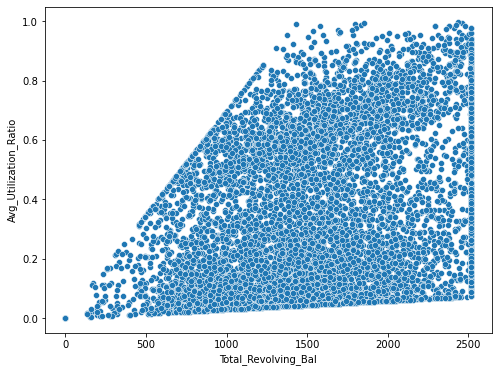

In [67]:
# the higher the average card utilization ratio, the higher the customer's total revolving balance
plt.figure(figsize=(8,6))
sns.scatterplot(x="Total_Revolving_Bal", y="Avg_Utilization_Ratio", data=data1);

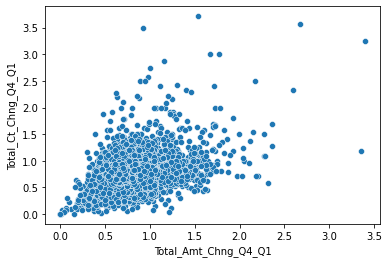

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Total_Amt_Chng_Q4_Q1", y="Total_Ct_Chng_Q4_Q1", data=data1);

### Visualization each numerical and categorical variable

#### Categorical

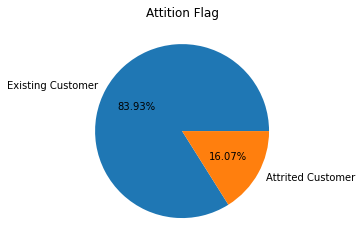

In [28]:
cust = data1['Attrition_Flag'].value_counts()
plt.pie(cust, labels=cust.index, autopct='%.2f%%')
plt.title('Attition Flag');

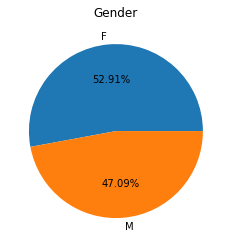

In [27]:
Gender = data1['Gender'].value_counts()
plt.pie(Gender, labels=Gender.index, autopct='%.2f%%')
plt.title('Gender');

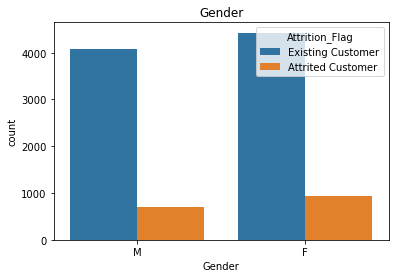

In [3]:
sns.countplot(x='Gender', hue='Attrition_Flag', data=data1)
plt.title('Gender');

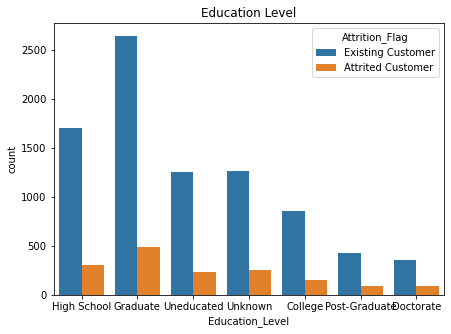

In [3]:
plt.figure(figsize=(7,5))
sns.countplot(x='Education_Level', hue='Attrition_Flag', data=data1)
plt.title('Education Level');

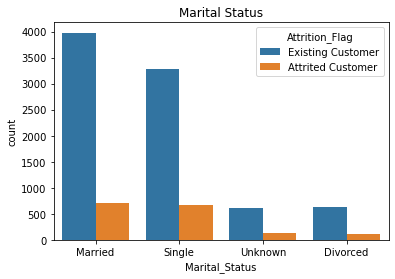

In [34]:
sns.countplot(x='Marital_Status', hue='Attrition_Flag', data=data1)
plt.title('Marital Status');

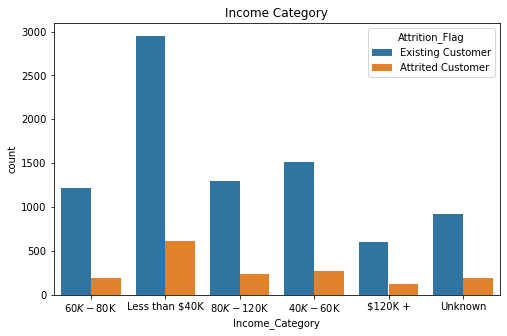

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=data1)
plt.title('Income Category');

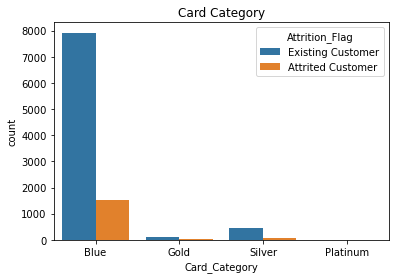

In [35]:
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=data1)
plt.title('Card Category');

From the visualization we can see that 16,07% customers are leaving and most customers are female. The pattern of existing and attrited customer is the same, most customers are graduated, married, income less than $40K and the card category is blue.

#### Numerical

In [5]:
num = data1.select_dtypes(['int64', 'float64'])
num.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

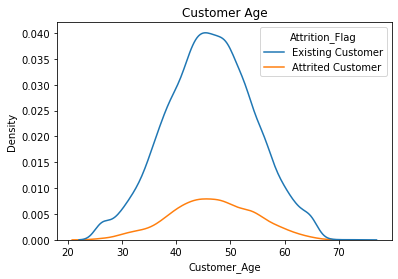

In [43]:
sns.kdeplot(data=data1, x='Customer_Age', hue='Attrition_Flag')
plt.title('Customer Age');

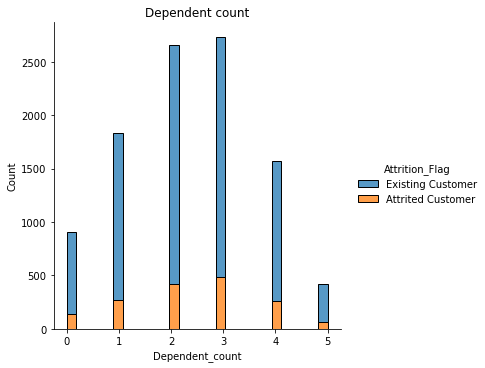

In [72]:
sns.displot(data=data1, x='Dependent_count', hue='Attrition_Flag',multiple="stack")
plt.title('Dependent count');

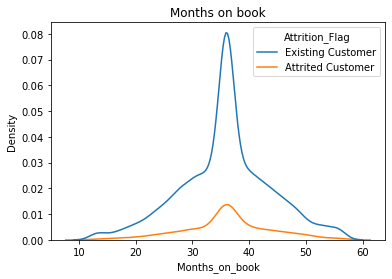

In [57]:
sns.kdeplot(data=data1, x='Months_on_book', hue='Attrition_Flag')
plt.title('Months on book');

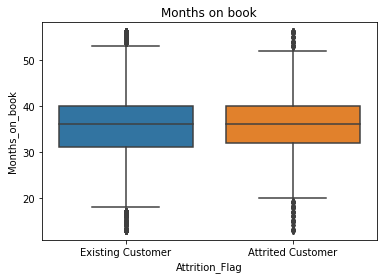

In [36]:
sns.boxplot(y='Months_on_book', x='Attrition_Flag', data=data1)
plt.title('Months on book');

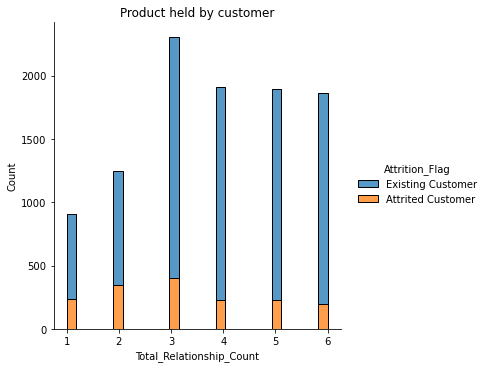

In [71]:
sns.displot(data=data1, x='Total_Relationship_Count', hue='Attrition_Flag', multiple="stack")
plt.title('Product held by customer');

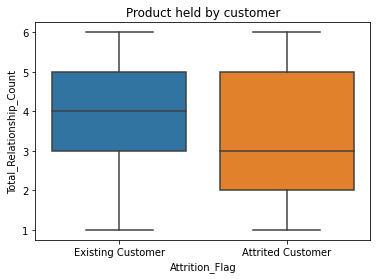

In [35]:
sns.boxplot(y='Total_Relationship_Count', x='Attrition_Flag', data=data1)
plt.title('Product held by customer');

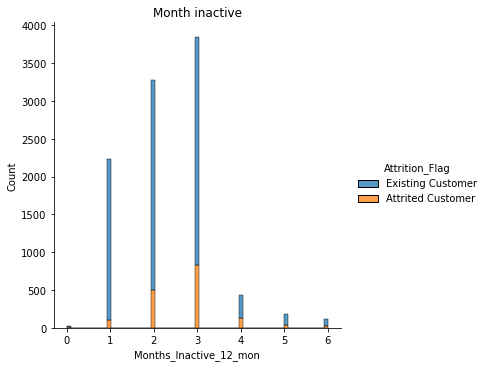

In [70]:
sns.displot(data=data1, x='Months_Inactive_12_mon', hue='Attrition_Flag', multiple="stack")
plt.title('Month inactive');

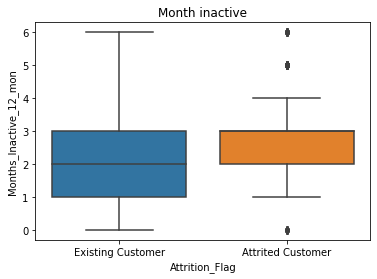

In [34]:
sns.boxplot(y='Months_Inactive_12_mon', x='Attrition_Flag', data=data1)
plt.title('Month inactive');

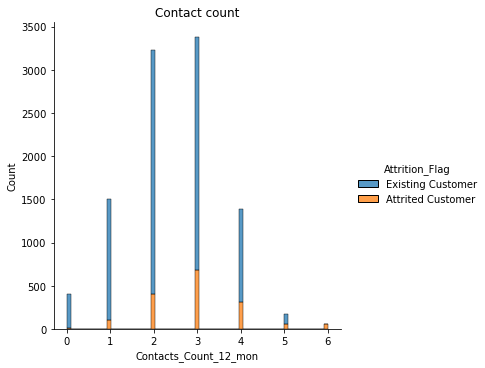

In [68]:
sns.displot(data=data1, x='Contacts_Count_12_mon', hue='Attrition_Flag', multiple="stack")
plt.title('Contact count');

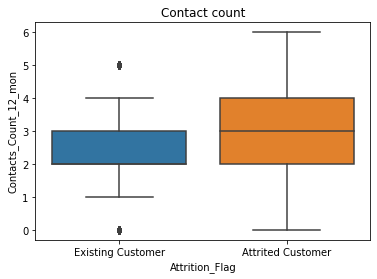

In [33]:
sns.boxplot(y='Contacts_Count_12_mon', x='Attrition_Flag', data=data1)
plt.title('Contact count');

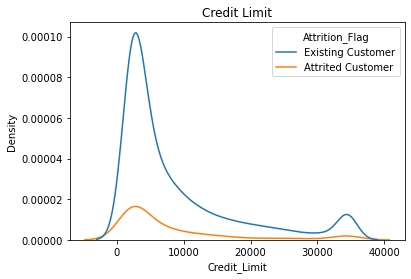

In [4]:
sns.kdeplot(data=data1, x='Credit_Limit', hue='Attrition_Flag')
plt.title('Credit Limit');

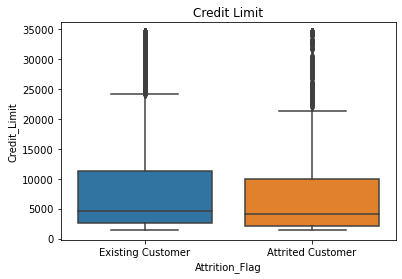

In [32]:
sns.boxplot(y='Credit_Limit', x='Attrition_Flag', data=data1)
plt.title('Credit Limit');

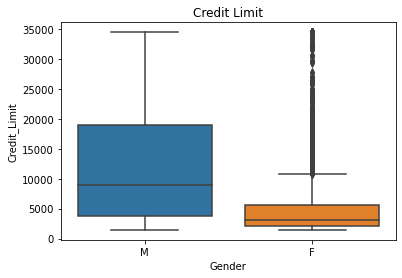

In [18]:
sns.boxplot(y='Credit_Limit', x='Gender', data=data1)
plt.title('Credit Limit');

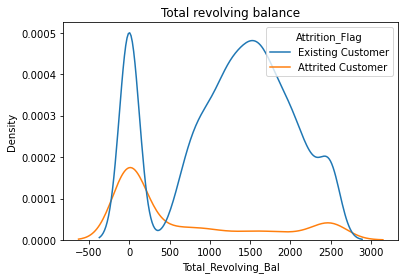

In [61]:
sns.kdeplot(data=data1, x='Total_Revolving_Bal', hue='Attrition_Flag')
plt.title('Total revolving balance');

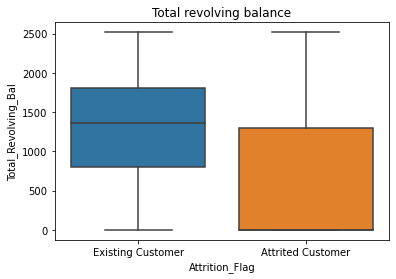

In [31]:
sns.boxplot(y='Total_Revolving_Bal', x='Attrition_Flag', data=data1)
plt.title('Total revolving balance');

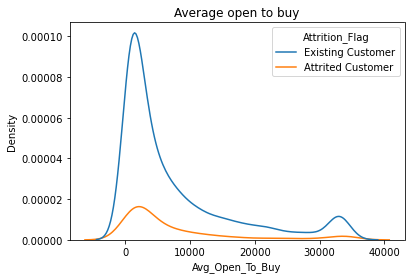

In [62]:
sns.kdeplot(data=data1, x='Avg_Open_To_Buy', hue='Attrition_Flag')
plt.title('Average open to buy');

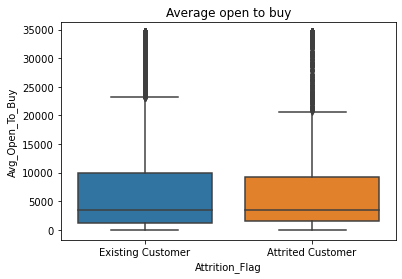

In [30]:
sns.boxplot(y='Avg_Open_To_Buy', x='Attrition_Flag', data=data1)
plt.title('Average open to buy');

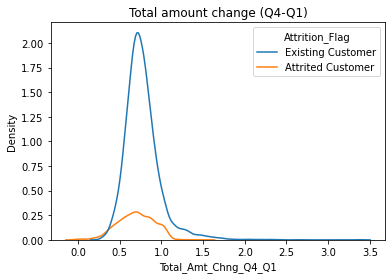

In [63]:
sns.kdeplot(data=data1, x='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag')
plt.title('Total amount change (Q4-Q1)');

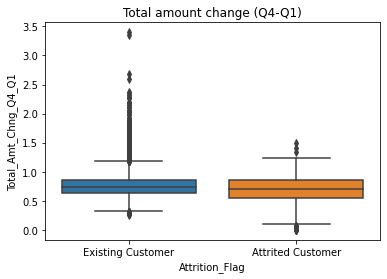

In [29]:
sns.boxplot(y='Total_Amt_Chng_Q4_Q1', x='Attrition_Flag', data=data1)
plt.title('Total amount change (Q4-Q1)');

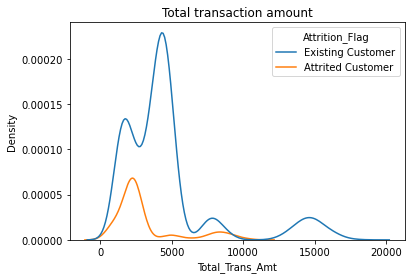

In [64]:
sns.kdeplot(data=data1, x='Total_Trans_Amt', hue='Attrition_Flag')
plt.title('Total transaction amount');

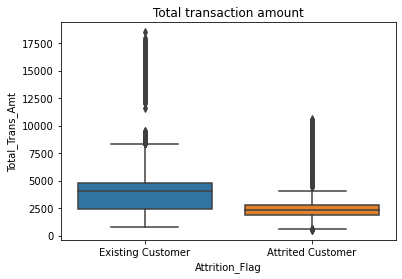

In [28]:
sns.boxplot(y='Total_Trans_Amt', x='Attrition_Flag', data=data1);
plt.title('Total transaction amount');

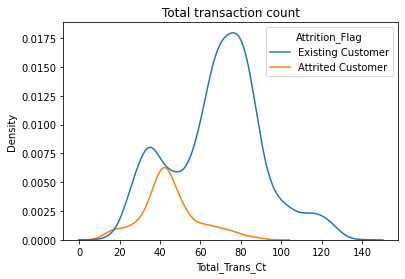

In [65]:
sns.kdeplot(data=data1, x='Total_Trans_Ct', hue='Attrition_Flag')
plt.title('Total transaction count');

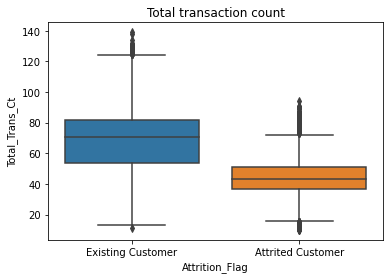

In [27]:
sns.boxplot(y='Total_Trans_Ct', x='Attrition_Flag', data=data1)
plt.title('Total transaction count');

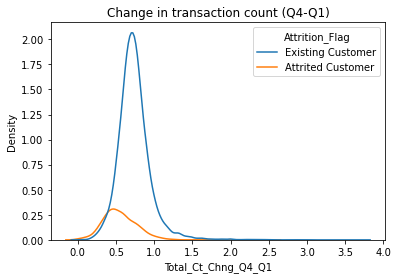

In [66]:
sns.kdeplot(data=data1, x='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag')
plt.title('Change in transaction count (Q4-Q1)');

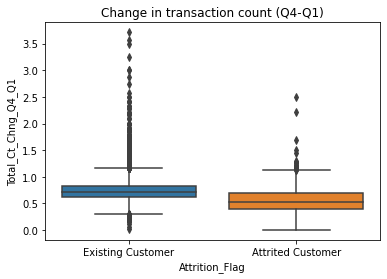

In [26]:
sns.boxplot(y='Total_Ct_Chng_Q4_Q1', x='Attrition_Flag', data=data1);
plt.title('Change in transaction count (Q4-Q1)');

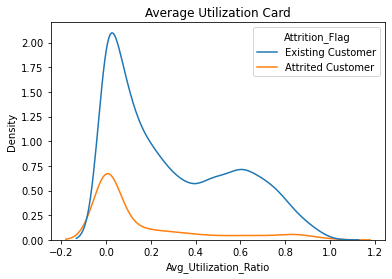

In [4]:
sns.kdeplot(data=data1, x='Avg_Utilization_Ratio', hue='Attrition_Flag')
plt.title('Average Utilization Card');

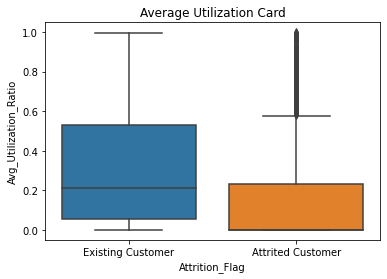

In [19]:
sns.boxplot(y='Avg_Utilization_Ratio', x='Attrition_Flag', data=data1)
plt.title('Average Utilization Card');

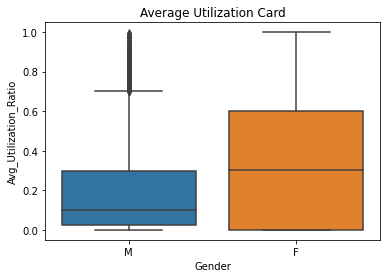

In [16]:
sns.boxplot(y='Avg_Utilization_Ratio', x='Gender', data=data1)
plt.title('Average Utilization Card');

From the visualization we can see the pattern of existing and attrited customer is slightly different, based on boxplot attrited customers are contacted more than existing customers, have lower transaction and tend to not take the loan or use their card anymore.

But there is interesting part where male customer have higher credit limit than the female but the average utilization majority from the female customer. Maybe because majority of the customer were female so their utilization is higher.

## Data Preprocessing Need Reload

### perform encoding for categorical data

In [28]:
cat = data1.select_dtypes(['object'])
cat.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

ordinal = Education_Level, Income_Category, Card_Category.

nominal = Gender, Marital_Status, Attrition_Flag.

In [7]:
# Ordinal
edu = {'Unknown':0,'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6}
income = {'Unknown':0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3,  '$80K - $120K':4, '$120K +':5 }
card = {'Blue':1, 'Silver':2, 'Gold':3, 'Platinum':4}

# i do this for attrition flag too because it's target variable
att = {'Attrited Customer':0, 'Existing Customer':1}

encode = data1.copy()
encode['Education_Level'].replace(edu, inplace=True) 
encode['Income_Category'].replace(income, inplace=True) 
encode['Card_Category'].replace(card, inplace=True)
encode['Attrition_Flag'].replace(att, inplace=True)

In [8]:
#use get dummies for nominal 
nom = ['Gender', 'Marital_Status']
all_encode = pd.get_dummies(encode, columns = nom)
all_encode

Attrition_Flag  Customer_Age  Dependent_count  Education_Level  \
0                   1            45                3                2   
1                   1            49                5                4   
2                   1            51                3                4   
3                   1            40                4                2   
4                   1            40                3                1   
...               ...           ...              ...              ...   
10122               1            50                2                4   
10123               0            41                2                0   
10124               0            44                1                2   
10125               0            30                2                4   
10126               0            43                2                4   

       Income_Category  Card_Category  Months_on_book  \
0                    3              1              39   
1                    1              1              44   
2                    4              1              36   
3                    1              1              34   
4                    3              1              21   
...                ...            ...             ...   
10122                2              1              40   
10123                2              1              25   
10124                1              1              36   
10125                2              1              36   
10126                1              2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  ...  Total_Trans_Amt  Total_Trans_Ct  \
0                          3  ...             1144              42   
1                          2  ...             1291              33   
2                          0  ...             1887              20   
3                          1  ...             1171              20   
4                          0  ...              816              28   
...                      ...  ...              ...             ...   
10122                      3  ...            15476             117   
10123                      3  ...             8764              69   
10124                      4  ...            10291              60   
10125                      3  ...             8395              62   
10126                      4  ...            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_F  Gender_M  \
0                    1.625                  0.061         0         1   
1                    3.714                  0.105         1         0   
2                    2.333                  0.000         0         1   
3                    2.333                  0.760         1         0   
4                    2.500                  0.000         0         1   
...                    ...                    ...       ...       ...   
10122                0.857                  0.462         0         1   
10123                0.683                  0.511         0         1   
10124                0.818                  0.000         1         0   
10125                0.722                  0.000         0         1   
10126                0.649                  0.189         1         0   

       Marital_Sta

### Split data

In [9]:
from sklearn.model_selection import train_test_split
X = all_encode.drop(columns='Attrition_Flag')
y = all_encode['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [10]:
X_train.head(3)

Customer_Age  Dependent_count  Education_Level  Income_Category  \
9504            28                1                5                1   
9448            38                2                4                3   
3909            40                3                0                1   

      Card_Category  Months_on_book  Total_Relationship_Count  \
9504              1              14                         2   
9448              1              25                         1   
3909              1              28                         2   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  ...  \
9504                       3                      3        3848.0  ...   
9448                       1                      1       11474.0  ...   
3909                       3                      3        1535.0  ...   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
9504            14054             105                0.694   
9448            13041              98                0.661   
3909             1921              41                0.464   

      Avg_Utilization_Ratio  Gender_F  Gender_M  Marital_Status_Divorced  \
9504                    0.0         1         0                        0   
9448                    0.0         0         1                        0   
3909                    0.0         1         0                        0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  
9504                       0                      1                       0  
9448                       0                      1                       0  
3909                       1                      0                       0  

[3 rows x 23 columns]

### Feature scaling

In [48]:
#skewness :
# -0.5 - 0.5 : normal
# -1 - 0.5 or 0.5 - 1 : moderately skewed
# -1 or greater than 1 : highly skewed
num.skew()

Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64

We can see that 7 values are normally distributed, 2 values moderately skewed and 5 values highly skewed.
Since most of the values normally distributed, i tend to use standardization (for the numerical only because we don't want assign a distribution to categorical features).

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

for i in num:
    scale = StandardScaler()
    X_train[i] = scale.fit_transform(X_train[[i]])
    X_test[i] = scale.transform(X_test[[i]])
X_train.head(3)

Customer_Age  Dependent_count  Education_Level  Income_Category  \
9504     -2.299090        -1.032355                5                1   
9448     -1.046856        -0.265982                4                3   
3909     -0.796409         0.500391                0                1   

      Card_Category  Months_on_book  Total_Relationship_Count  \
9504              1       -2.752338                 -1.177346   
9448              1       -1.375260                 -1.823346   
3909              1       -0.999693                 -1.177346   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  ...  \
9504                0.671587               0.486415     -0.518428  ...   
9448               -1.328500              -1.337769      0.338751  ...   
3909                0.671587               0.486415     -0.778414  ...   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
9504         2.824914        1.707462            -0.079923   
9448         2.528029        1.408774            -0.221208   
3909        -0.730967       -1.023398            -1.064635   

      Avg_Utilization_Ratio  Gender_F  Gender_M  Marital_Status_Divorced  \
9504              -1.007474         1         0                        0   
9448              -1.007474         0         1                        0   
3909              -1.007474         1         0                        0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  
9504                       0                      1                       0  
9448                       0                      1                       0  
3909                       1                      0                       0  

[3 rows x 23 columns]

### Treat the imbalance dataset

In [12]:
from imblearn.over_sampling import SMOTE
a = (y_train).value_counts()
print('before :')
print(a)
print('')
sm = SMOTE(random_state = 1)
X_sm, y_sm = sm.fit_resample(X_train, y_train)
b = (y_sm).value_counts()
print('after:')
print(b)

before :
1    5983
0    1105
Name: Attrition_Flag, dtype: int64

after:
0    5983
1    5983
Name: Attrition_Flag, dtype: int64


## Model building

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, recall_score

#### KNN

In [14]:
knn = KNeighborsClassifier(n_neighbors=3) 
model_knn = knn.fit(X_sm, y_sm)
y_pred = knn.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, y_pred))
print('Recall/ sensitivity : ',recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy :  0.8657453109575518
Recall/ sensitivity :  0.8760429082240763
[[ 426   96]
 [ 312 2205]]


#### Decision Tree

In [15]:
dt = DecisionTreeClassifier()
dtc = dt.fit(X_sm, y_sm)
y_pred = dt.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, y_pred))
print('Recall/ sensitivity : ',recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy :  0.9243172096084238
Recall/ sensitivity :  0.946762018275725
[[ 426   96]
 [ 134 2383]]


#### Random Forest

In [16]:
rf = RandomForestClassifier()
rfc = rf.fit(X_sm, y_sm)
y_pred = rf.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, y_pred))
print('Recall/ sensitivity : ',recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy :  0.9565646594274433
Recall/ sensitivity :  0.9749702026221693
[[ 453   69]
 [  63 2454]]


#### XGBoost

In [17]:
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_sm, y_sm)
y_pred = xgb.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, y_pred))
print('Recall/ sensitivity : ',recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy :  0.9740046067785456
Recall/ sensitivity :  0.9856972586412396
[[ 479   43]
 [  36 2481]]


### Finding best parameters using grid search

In [18]:
from sklearn.model_selection import GridSearchCV

#### KNN

In [19]:
params = {'n_neighbors': [1, 3, 5, 7, 9]}
gs_knn = GridSearchCV(estimator = knn,
                       param_grid = params,
                       scoring = 'accuracy', cv=10)
gs_knn.fit(X_sm, y_sm)
print('best estimator: ', gs_knn.best_estimator_)
print('best score : ',gs_knn.best_score_)

best estimator:  KNeighborsClassifier(n_neighbors=1)
best score :  0.948102279109144


#### Decision tree

In [20]:
param = {'max_depth': [3, 15, 20, 40, 60],'criterion':['gini', 'entropy' ]}
gs_dt = GridSearchCV(estimator = dt,
                       param_grid = param,
                       scoring = 'accuracy', cv=10)
gs_dt.fit(X_sm, y_sm)
print('best estimator: ', gs_dt.best_estimator_)
print('best score : ',gs_dt.best_score_)

best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=20)
best score :  0.951866427495718


#### Random forest

In [21]:
parameter = {'n_estimators': [50, 100, 150, 200],'criterion':['gini', 'entropy' ]}
gs_rf = GridSearchCV(estimator = rf,
                       param_grid = parameter,
                       scoring = 'accuracy', cv=10)
gs_rf.fit(X_sm, y_sm)
print('best estimator: ', gs_rf.best_estimator_)
print('best score : ',gs_rf.best_score_)

best estimator:  RandomForestClassifier(criterion='entropy', n_estimators=200)
best score :  0.9786912934510189


#### XGBoost

In [22]:
parameters = {'n_estimators': [50, 100, 150, 200], 'max_depth':[1, 2, 3, 4, 5, 6, 7]}
gs_xgb = GridSearchCV(estimator = xgb,
                       param_grid = parameters,
                       scoring = 'accuracy', cv=10)
gs_xgb.fit(X_sm, y_sm)
print('best estimator: ', gs_xgb.best_estimator_)
print('best score : ',gs_xgb.best_score_)

best estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=2,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
best score :  0.9817015364498202


### Model selection

In [23]:
m_knn = KNeighborsClassifier(n_neighbors=1)
m_dt = DecisionTreeClassifier(criterion='entropy', max_depth=20)
m_rf = RandomForestClassifier(criterion='entropy', n_estimators=200)
m_xgb = XGBClassifier(eval_metric='logloss', learning_rate=0.300000012, 
                      max_depth=4, n_estimators=200, n_jobs=2)
model = [m_knn, m_dt, m_rf, m_xgb]
names = ['KNN','DT','RF', 'XGB']

for i in range(len(model)):
  print(names[i])
  model[i].fit(X_sm, y_sm)
  y_pred = model[i].predict(X_test)
  print('Accuracy : ',accuracy_score(y_test, y_pred))    
  print('Recall/ sensitivity : ',recall_score(y_test, y_pred)) 
  print('--------')
  print('')

KNN
Accuracy :  0.8752879236590984
Recall/ sensitivity :  0.9034564958283671
--------

DT
Accuracy :  0.9318854886475815
Recall/ sensitivity :  0.9507350019864919
--------

RF
Accuracy :  0.9572227706482396
Recall/ sensitivity :  0.9753675009932459
--------

XGB
Accuracy :  0.9736755511681474
Recall/ sensitivity :  0.9856972586412396
--------



The best model is XGBoostClassifier with accuracy 0.97 and recall 0.98